<a href="https://colab.research.google.com/github/Dhayanshariff/Task-6_Assignment-4-5-6-7-8/blob/main/Assignment%208/Task_6_Assignment_8_Car_Worth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools as it

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [12]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [13]:
regression_model = linear_model.LinearRegression()
mileage = df[['Mileage']]
price = df['Price']
mileage.head()

,Mileage
0,8221
1,9135
2,13196
3,16342
4,19832


In [15]:
regression_model.fit(mileage,price)
regression_model.coef_[0]

-0.1725205027912493

In [16]:
regression_model.intercept_

24764.559006061685

In [17]:
# 1.1 Find the linear regression equation for mileage vs price.
print(f'Linear regression equation for mileage vs price is : y = {regression_model.coef_[0]:.4f}*x + {regression_model.intercept_:.4f}')

Linear regression equation for mileage vs price is : y = -0.1725*x + 24764.5590


<function matplotlib.pyplot.show(*args, **kw)>

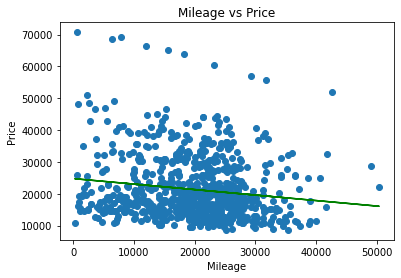

In [20]:
# 1.2 Chart the original data and the equation on the chart.
cons_mileage  = regression_model.coef_[0]*mileage + regression_model.intercept_
plt.scatter(mileage, price)
plt.plot(mileage , cons_mileage, c = 'green')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show

In [31]:
# 1.3 Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
r_square = regression_model.score(mileage,price)
print('R^2 score is :',r_square)
if r_square > 0.8:
    print('This equation is a good fit')
else:
    print('This equation is not a good fit')

R^2 score is : 0.02046344732348926
This equation is not a good fit


In [23]:
# 2.1 Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
features = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
car_data_features = df[features]
car_price = df['Price']
car_data_features.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1


In [24]:
car_price.head()

0    17314.103129
1    17542.036083
2    16218.847862
3    16336.913140
4    16339.170324
Name: Price, dtype: float64

In [25]:
regression_model_1 = linear_model.LinearRegression()
regression_model_1.fit(car_data_features,car_price)
regression_model_1.coef_

array([-1.69747832e-01,  3.79237893e+03, -7.87220732e+02, -1.54274585e+03,
        6.28899715e+03, -1.99379528e+03,  3.34936162e+03])

In [26]:
regression_model_1.intercept_

6758.755143598106

In [27]:
regression_model_1.score(car_data_features, car_price)

0.4462643536728379

In [29]:
print(f'The Linear regression equation for mileage, cylinders, liters, doors, cruise, sound, and leather vs price is : y = {regression_model_1.coef_[0]:.4f}*x + {regression_model_1.intercept_:.4f}')

The Linear regression equation for mileage, cylinders, liters, doors, cruise, sound, and leather vs price is : y = -0.1697*x + 6758.7551


In [32]:
# 2.2 Find the equation's score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.) 
r_square_1 = regression_model_1.score(car_data_features,car_price)
print('R^2 score is :',r_square_1)
if r_square_1 > 0.8:
    print('This equation is a good fit')
else:
    print('This equation is not a good fit')

R^2 score is : 0.4462643536728379
This equation is not a good fit


In [34]:
# 2.3 Find the combination of the factors that is the best predictor for price.
combination_of_factors = [list(it.combinations(features, n + 1)) for n in range(len(features))]
def regrsn(col,df,dep='Price'):
  dep=df[dep]
  ind=df[col]
  regression_model_2 =linear_model.LinearRegression().fit(ind,dep)
  return regression_model_2.score(ind,dep),regression_model_2.coef_

def score(com,df):
  score={}
  for i in range(len(com)):
    for j in com[i]:
      score[j]= regrsn(list(j),df)
  return score

In [35]:
com_scores = score(combination_of_factors,df)

In [36]:
sort_price=sorted(com_scores.items(),key=lambda x:x[1],reverse=True)

In [39]:
sort_price[0]

(('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'),
 (0.4462643536728379,
  array([-1.69747832e-01,  3.79237893e+03, -7.87220732e+02, -1.54274585e+03,
          6.28899715e+03, -1.99379528e+03,  3.34936162e+03])))

In [45]:
print('Combination for best prediction of price with highest R^2 score: ',sort_price[0][0])

Combination for best prediction of price with highest R^2 score:  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
